In [ ]:
conda install gdal -c conda-forge

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


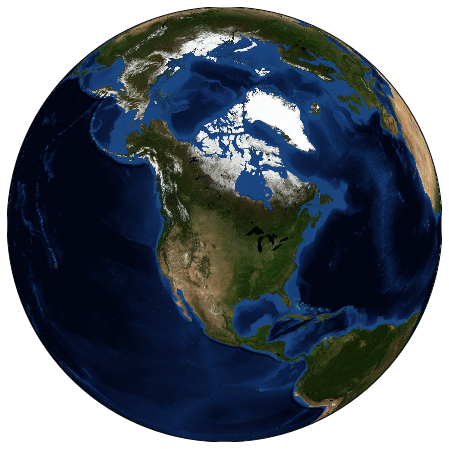

In [3]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [10]:
conda install basemap-data-hires

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


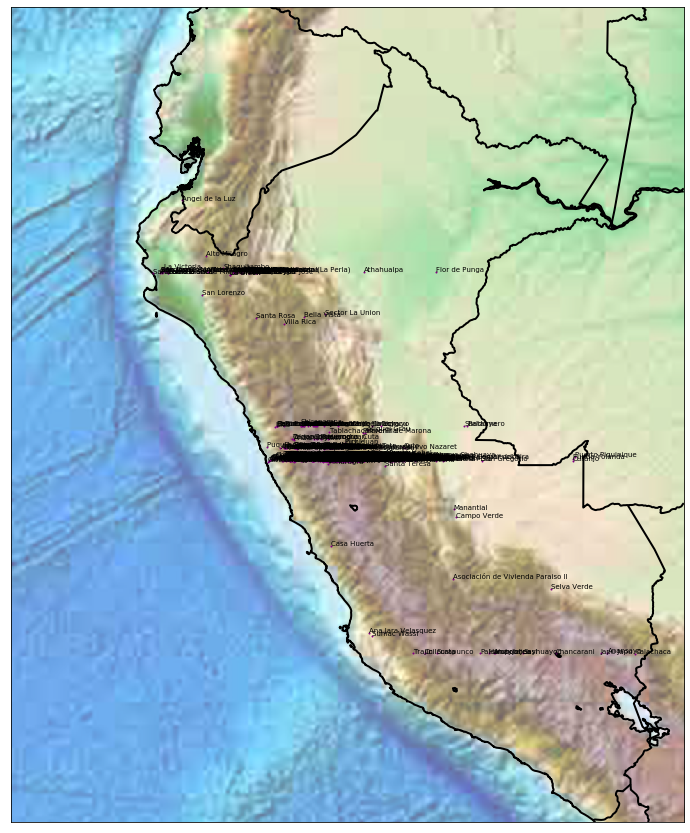

In [83]:
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='mill', resolution='h', 
            lat_0=-9.1899672, lon_0=-75.015152,llcrnrlat = -18.384377,
            llcrnrlon = -84.342834,
            urcrnrlat = 0.936457,
            urcrnrlon = -68.225205)
m.etopo(scale=4, alpha=0.6)

# Map (long, lat) to (x, y) for plotting
x, y = m(-72.531266212, -13.992029757)

#plt.plot(x, y, 'ok', markersize=1)
m.drawcoastlines(linewidth=2)
m.drawcountries(linewidth=2)
#plt.text(x, y, ' Seattle', fontsize=9);

pD, pla, c = readCPxDto('test1008.csv')
for i in range(len(pla)):
    d = pla[i]
    for j in range(len(c[d])):
        x, y = m(pD[d][j]['x'], pD[d][j]['y'])
        plt.plot(x, y,'ok',markersize=1,color='purple')
        plt.text(x, y, pD[d][j]['name'], fontsize=7)
        del x
        del y

In [43]:
import heapq as hq
import math
import csv

def readCPxDto(fileName):
    dictionary = {}
    cp = {}
    places = []
    with open(fileName) as csvfile:
        file = csv.reader(csvfile, delimiter=',')
        idElem = -1
        for row in file:
            if idElem != -1:
                elem = {}
                elem["name"] = row[5]
                elem["x"] = float(row[15])
                elem["y"] = float(row[16])
                if row[1] not in dictionary:
                    dictionary[row[1]] = []
                    dictionary[row[1]].append(elem)
                    cp[row[1]] = []
                    cp[row[1]].append(elem['name'])
                    places.append(row[1])
                else:
                    dictionary[row[1]].append(elem)
                    cp[row[1]].append(elem['name'])
                del elem
            
            idElem += 1
        
    return dictionary, places, cp

In [44]:
def calculateDistance(x1,y1,x2,y2):        
    return ((x1-x2)**2 + (y1-y2)**2)**(0.5)

In [85]:

def prim(distancia,nombre, dptos):
    pathDic = {}
    for a in range(len(dptos)):
        dpto = dptos[a]
        pathDic[dpto]=[]
        n = len(distancia[dpto])
        dist = [math.inf]*n
        path = [None]*n
        visited = [False]*n
        q = []
        hq.heappush(q, (0, 0))
        contador=0
        while len(q) > 0:
            #print(contador)
            contador+=1
            _, u = hq.heappop(q)
            if not visited[u]:
                visited[u] = True
                for v, w in distancia[dpto][u]:
                    if not visited[v] and w < dist[v] and w!=0 :
                        dist[v] = w
                        path[v] = nombre[dpto][v][u]
                        hq.heappush(q, (w, v))
        for i in range(len(path)):
            if nombre[dpto][v][i] not in path:
                path[0]=nombre[dpto][v][i]
        pathDic[dpto]=path
    print(pathDic)
    fig = plt.figure(figsize=(15, 15))
    m = Basemap(projection='mill', resolution='h', 
                lat_0=-9.1899672, lon_0=-75.015152,llcrnrlat = -18.384377,
                llcrnrlon = -84.342834,
                urcrnrlat = 0.936457,
                urcrnrlon = -68.225205)
    m.etopo(scale=4, alpha=0.6)

    # Map (long, lat) to (x, y) for plotting
    x, y = m(-72.531266212, -13.992029757)

    #plt.plot(x, y, 'ok', markersize=1)
    m.drawcoastlines(linewidth=2)
    m.drawcountries(linewidth=2)
    #plt.text(x, y, ' Seattle', fontsize=9);
    xs=[]
    ys=[]
    pD, pla, c = readCPxDto('test1008.csv')
    for i in range(len(pathDic)):
        d = pla[i]
        for j in range(len(pathDic[d])):
            x, y = m(pD[d][j]['x'], pD[d][j]['y'])
            xs.append(x)
            ys.append(y)
            plt.plot(x, y,'ok',markersize=1,color='purple')
            plt.text(x, y, pD[d][j]['name'], fontsize=7)
            del x
            del y
    m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')
    


In [89]:
def distPrimMap(filename):
    placesDictionary, places, cp = readCPxDto(filename)
    #print (placesDictionary['JUNIN'])
    dis = {}
    abc = {}
    for a in range(len(places)):
        dpto = places[a]
        dis[dpto] = []
        abc[dpto] = []
        for b in range (len(cp[dpto])):
            aux = []
            aux2 = []
            for c in range (len(cp[dpto])):
                aux.append((int(c), calculateDistance(float(placesDictionary[dpto][b]["x"]),float(placesDictionary[dpto][b]["y"]), float(placesDictionary[dpto][c]["x"]),float(placesDictionary[dpto][c]["y"]))))
                aux2.append(placesDictionary[dpto][c]["name"])
            dis[dpto].append(aux)
            abc[dpto].append(aux2)
            del aux
            del aux2
    #print(abc['AYACUCHO'])
    prim(dis, abc, places)
    

{'JUNIN': ['Manantial', 'Campo Verde'], 'ICA': ['Ana Jara Velasquez', 'Sumac Wassi'], 'CUSCO': ['Sayhuayoc', 'Selva Verde', 'Chancarani'], 'TUMBES': ['Angel de la Luz'], 'LIMA': ['Casa Huerta'], 'SAN MARTIN': ['Sector La Union', 'Bella Vista'], 'PIURA': ['La Victoria', 'Alto Milagro', 'Loma Blanca', 'Jose Carlos Mariategui', 'Fundo Rio Frio', 'Jose Carlos Mariategui', 'Villa Flor', 'Hacienda San Juan de Chato', 'Nuevo Zona More', 'Jose Carlos Mariategui', 'Nuevo Zona More', 'Huayanay', 'San Jose', 'Hacienda San Juan de Chato'], 'LAMBAYEQUE': ['San Lorenzo'], 'ANCASH': ['Fe Y Esperanza', 'Mismi', 'Carpa', 'Paccha', 'Huacahuain Grande', 'Fundo Maria', 'Ranya / Rauya', 'Agopampa', 'Chupis Punta', 'San Pedro', 'Racacha', 'Huasta', 'San Antonio', 'Angel Monte', 'Keroucru', 'Huayup', 'Fundo Maria', 'San Damian', 'Hacienda Yurac Rumi', 'Garbanzo Cancha', 'Izco Pata', 'Ushno Huain', 'Mesa Pampa', 'Mercedes', 'Paccha', 'Huallanca', 'Capiash', 'Andahuaylas', 'Incahuasi Bajo', 'Mina Bien Venida',

/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


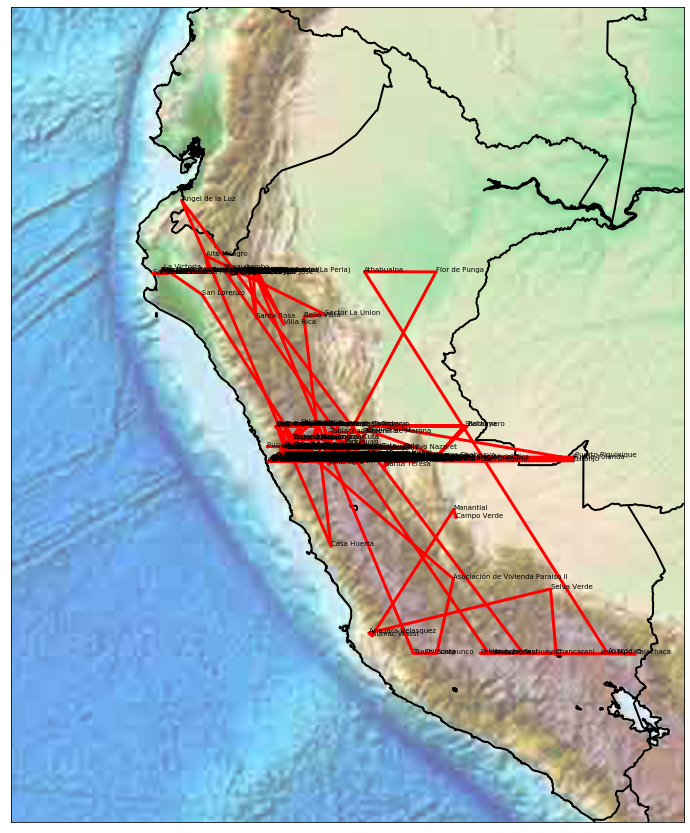

In [90]:
distPrimMap('test1008.csv')